# Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data file
full_df = pd.read_csv("../Data-Collisions.csv")
full_df.head()

/Users/Katie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
full_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
full_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [46]:
df = full_df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df = df[df['WEATHER'] != 'Unknown']
df = df[df['ROADCOND'] != 'Unknown']
df = df[df['LIGHTCOND'] != 'Unknown']
df['SEVERITYCODE'].value_counts()
full_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [42]:
# Downsample

df_1 = df[df['SEVERITYCODE']==1]
df_2 = df[df['SEVERITYCODE']==2]

df_1_downsampled = df_1.sample(n=56983)

df = pd.concat([df_1_downsampled,df_2]).reset_index()
df['SEVERITYCODE'].value_counts()




2    56983
1    56983
Name: SEVERITYCODE, dtype: int64

In [49]:
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [33]:
df.dtypes

index            int64
SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [36]:
df['ROADCOND'].value_counts()

Dry               76081
Wet               29247
Unknown            6935
Ice                 683
Snow/Slush          542
Other                80
Standing Water       60
Sand/Mud/Dirt        38
Oil                  35
Name: ROADCOND, dtype: int64

In [ ]:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8#:~:text=Logistic%20Regression%20is%20a%20Machine,%2C%20failure%2C%20etc.).

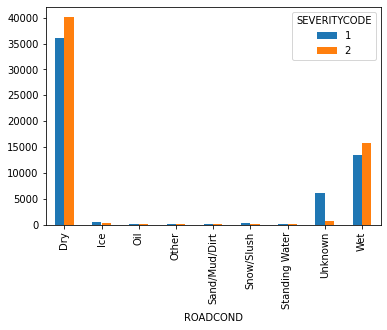

In [37]:
pd.crosstab(df['ROADCOND'],df['SEVERITYCODE']).plot(kind='bar')

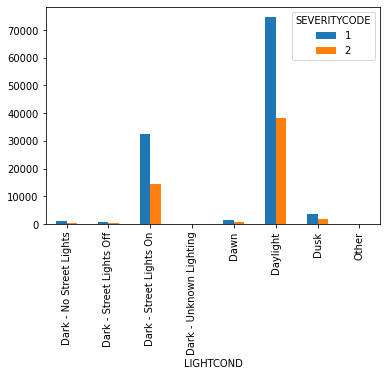

In [47]:
pd.crosstab(df['LIGHTCOND'],df['SEVERITYCODE']).plot(kind='bar')

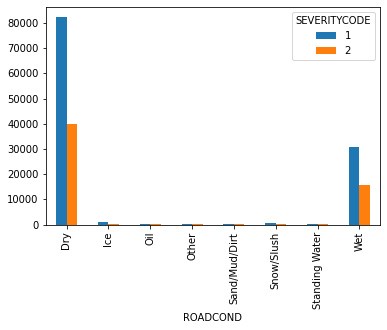

In [48]:
pd.crosstab(df['ROADCOND'],df['SEVERITYCODE']).plot(kind='bar')